### Arbitragem em ativos da B3 vs NYSE/Nasdaq
A ideia é encontrar divergências de preços de ações da B3 em relação às ações da mesma empresa negociadas em bolsas americanas

##### Importando bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import requests
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

##### Obtendo cotações das ADRs

In [2]:
url = 'https://br.investing.com/equities/brazil-adrs'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36'}
r = requests.get(url, headers=header)
adrs = pd.read_html(r.text)[0]

In [3]:
adrs

,Nome,Último,Máxima,Mínima,Variação,Var. %,Vol.,Hora
0,ITUB Itau Unibanco,5625,5680,5600,-15,"-0,27%","14,88M",15:13:31
1,ABEV Ambev SA,2745,2770,2730,15,"+0,55%","10,99M",15:12:51
2,BBD Banco Bradesco,3065,3090,3040,5,"+0,16%","10,93M",15:12:20
3,VALE Vale ADR,1437,1459,1430,-3,"-0,21%","9,72M",15:11:54
4,PBR Petroleo Brasileiro Petrobras ADR,1528,1541,1518,-9,"-0,59%","9,1M",15:13:30
5,CIG Energy of Minas Gerais,2590,2640,2580,10,"+0,39%","2,94M",15:10:39
6,GGB Gerdau ADR,5260,5290,5240,-10,"-0,19%","2,86M",15:12:21
7,PBRa Petroleo Brasileiro ADR Reptg 2 Pref,1386,1392,1380,-4,"-0,29%","2,26M",15:12:44
8,BRFS BRF ADR,1875,1940,1870,-35,"-1,83%","1,33M",15:12:48
9,UGP Ultrapar Participacoes,3895,3920,3820,85,"+2,23%","1,19M",15:10:30


In [4]:
adrs['Ticker'] = adrs['Nome'].str.split().str.get(0)
adrs

,Nome,Último,Máxima,Mínima,Variação,Var. %,Vol.,Hora,Ticker
0,ITUB Itau Unibanco,5625,5680,5600,-15,"-0,27%","14,88M",15:13:31,ITUB
1,ABEV Ambev SA,2745,2770,2730,15,"+0,55%","10,99M",15:12:51,ABEV
2,BBD Banco Bradesco,3065,3090,3040,5,"+0,16%","10,93M",15:12:20,BBD
3,VALE Vale ADR,1437,1459,1430,-3,"-0,21%","9,72M",15:11:54,VALE
4,PBR Petroleo Brasileiro Petrobras ADR,1528,1541,1518,-9,"-0,59%","9,1M",15:13:30,PBR
5,CIG Energy of Minas Gerais,2590,2640,2580,10,"+0,39%","2,94M",15:10:39,CIG
6,GGB Gerdau ADR,5260,5290,5240,-10,"-0,19%","2,86M",15:12:21,GGB
7,PBRa Petroleo Brasileiro ADR Reptg 2 Pref,1386,1392,1380,-4,"-0,29%","2,26M",15:12:44,PBRa
8,BRFS BRF ADR,1875,1940,1870,-35,"-1,83%","1,33M",15:12:48,BRFS
9,UGP Ultrapar Participacoes,3895,3920,3820,85,"+2,23%","1,19M",15:10:30,UGP


In [5]:
tickers_adrs = list(adrs['Ticker'])
tickers_adrs

['ITUB',
 'ABEV',
 'BBD',
 'VALE',
 'PBR',
 'CIG',
 'GGB',
 'PBRa',
 'BRFS',
 'UGP',
 'SID',
 'AZUL',
 'EBR',
 'GOL',
 'SBS',
 'CBD',
 'ERJ',
 'VIV',
 'BSBR',
 'ELP',
 'TIMB',
 'BAK',
 'BDORY',
 'JBSAY',
 'BBDO',
 'MRRTY',
 'CIGc',
 'LND',
 'EGIEY',
 'CIOXY',
 'ATLX',
 'BBSEY',
 'EBRb',
 'LRENY',
 'LZRFY',
 'HYPMY',
 'USNZY',
 'KLBAY',
 'OIBZQ',
 'CYRBY',
 'OIBRQ',
 'GFASY',
 'COGNY',
 'PDGRY',
 'ESTRF',
 'CTPTY',
 'SYYNY',
 'EQUEY',
 'IOCJY',
 'LGSXY']

In [6]:
cotacao_adrs = yf.download(tickers_adrs)['Close']
cotacao_adrs

[*********************100%***********************]  50 of 50 completed


3 Failed downloads:
['PBRA', 'CIGC', 'EBRB']: Exception('%ticker%: No timezone found, symbol may be delisted')


,ABEV,ATLX,AZUL,BAK,BBD,BBDO,BBSEY,BDORY,BRFS,BSBR,...,PBRA,PDGRY,SBS,SID,SYYNY,TIMB,UGP,USNZY,VALE,VIV
Date,,,,,,,,,,,,,,,,,,,,,
1996-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11,2.780,27.209999,8.240,9.420,2.970,2.65,6.30,9.49,1.790,5.40,...,NaN,2.0,11.900,2.45,3.4,14.89,3.780,1.3600,13.690,8.600
2023-09-12,2.730,25.650000,8.250,9.200,2.990,2.74,6.41,9.60,1.830,5.42,...,NaN,2.0,11.940,2.42,3.4,15.11,3.830,1.3800,13.600,8.640
2023-09-13,2.740,24.660000,8.370,9.080,3.030,2.71,6.44,9.52,1.910,5.47,...,NaN,2.0,12.190,2.45,3.4,15.27,3.700,1.3600,13.700,8.710


In [ ]:
cotacao_adrs.index.

##### Obtendo cotações das Ações

In [9]:
acoes = ['BBDC4', 'VALE3', 'PETR4', 'ITUB4', 'ABEV3', 'GGBR4', 'CMIG4', 
         'BRFS3', 'CSNA3', 'EMBR3', 'AZUL4', 'PCAR3', 'SBSP3', 'VIVT3', 
         'GOLL3', 'BRKM3', 'TIMS3', 'UGPA3', 'ELET3', 'CPLE6', 'SANB11',
         'JBSS3', 'BBSE3', 'BBAS3', 'AGRO3', 'EGIE3', 'COGN3', 'CIEL3',
         'RENT3', 'LIGT3', 'USIM5', 'MRFG3', 'CYRE3', 'LREN3', 'HYPE3',
         'OIBR4', 'GFSA3', 'KLBN11', 'PDGR3', 'ESTR4', 'TRPL4', 'SYNE3',
         'EQTL3']
acoes

['BBDC4',
 'VALE3',
 'PETR4',
 'ITUB4',
 'ABEV3',
 'GGBR4',
 'CMIG4',
 'BRFS3',
 'CSNA3',
 'EMBR3',
 'AZUL4',
 'PCAR3',
 'SBSP3',
 'VIVT3',
 'GOLL3',
 'BRKM3',
 'TIMS3',
 'UGPA3',
 'ELET3',
 'CPLE6',
 'SANB11',
 'JBSS3',
 'BBSE3',
 'BBAS3',
 'AGRO3',
 'EGIE3',
 'COGN3',
 'CIEL3',
 'RENT3',
 'LIGT3',
 'USIM5',
 'MRFG3',
 'CYRE3',
 'LREN3',
 'HYPE3',
 'OIBR4',
 'GFSA3',
 'KLBN11',
 'PDGR3',
 'ESTR4',
 'TRPL4',
 'SYNE3',
 'EQTL3']

In [10]:
acoes_yf = [i + '.SA' for i in acoes]
acoes_yf

['BBDC4.SA',
 'VALE3.SA',
 'PETR4.SA',
 'ITUB4.SA',
 'ABEV3.SA',
 'GGBR4.SA',
 'CMIG4.SA',
 'BRFS3.SA',
 'CSNA3.SA',
 'EMBR3.SA',
 'AZUL4.SA',
 'PCAR3.SA',
 'SBSP3.SA',
 'VIVT3.SA',
 'GOLL3.SA',
 'BRKM3.SA',
 'TIMS3.SA',
 'UGPA3.SA',
 'ELET3.SA',
 'CPLE6.SA',
 'SANB11.SA',
 'JBSS3.SA',
 'BBSE3.SA',
 'BBAS3.SA',
 'AGRO3.SA',
 'EGIE3.SA',
 'COGN3.SA',
 'CIEL3.SA',
 'RENT3.SA',
 'LIGT3.SA',
 'USIM5.SA',
 'MRFG3.SA',
 'CYRE3.SA',
 'LREN3.SA',
 'HYPE3.SA',
 'OIBR4.SA',
 'GFSA3.SA',
 'KLBN11.SA',
 'PDGR3.SA',
 'ESTR4.SA',
 'TRPL4.SA',
 'SYNE3.SA',
 'EQTL3.SA']

In [11]:
cotacao_acoes = yf.download(acoes_yf)['Close']
cotacao_acoes

[*********************100%***********************]  43 of 43 completed


1 Failed download:
['GOLL3.SA']: IndexError('index 0 is out of bounds for axis 0 with size 0')


,ABEV3.SA,AGRO3.SA,AZUL4.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BRFS3.SA,BRKM3.SA,CIEL3.SA,CMIG4.SA,...,RENT3.SA,SANB11.SA,SBSP3.SA,SYNE3.SA,TIMS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,2.733333,NaN,NaN,861.108337,NaN,NaN,10500.434570,...,NaN,NaN,7.815000,5.75,NaN,6299.370117,NaN,2.133333,3.500000,24.000000
2000-01-04,NaN,NaN,NaN,2.603333,NaN,NaN,855.558350,NaN,NaN,9974.599609,...,NaN,NaN,7.351666,5.75,NaN,5499.450195,NaN,2.055555,3.416666,23.350000
2000-01-05,0.520882,NaN,NaN,2.630000,NaN,NaN,855.558350,NaN,NaN,10028.809570,...,NaN,NaN,7.147083,5.75,NaN,6099.390137,NaN,2.251111,3.416666,23.610001
2000-01-06,0.494478,NaN,NaN,2.666666,NaN,NaN,833.333313,NaN,NaN,10161.624023,...,NaN,NaN,7.111250,5.75,NaN,6009.398926,NaN,2.455555,3.416666,24.129999
2000-01-07,0.494478,NaN,NaN,2.606666,NaN,NaN,833.333313,NaN,NaN,10191.439453,...,NaN,NaN,7.211250,5.75,NaN,5799.419922,NaN,2.553333,3.541666,24.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,13.980000,25.750000,13.81,46.779999,14.38,31.090000,9.040000,25.299999,3.71,12.110000,...,60.590000,26.700001,57.860001,4.12,14.38,24.150000,18.340000,6.920000,67.989998,41.730000
2023-09-08,13.700000,26.370001,13.67,46.639999,14.38,31.110001,8.860000,25.430000,3.67,12.160000,...,60.349998,26.500000,57.680000,4.08,14.44,24.110001,18.379999,6.830000,66.709999,41.860001
2023-09-11,13.870000,27.080000,13.67,47.380001,14.65,31.790001,8.740000,24.709999,3.68,12.390000,...,61.240002,26.969999,59.000000,4.06,14.71,24.270000,18.959999,6.900000,67.669998,42.490002


##### Obtendo cotações de moedas

In [18]:
moedas = ['USDBRL=X', 'BTC-USD']

In [19]:
cotacao_moedas = yf.download(moedas)['Close']
cotacao_moedas

[*********************100%***********************]  2 of 2 completed


,BTC-USD,USDBRL=X
Date,,
2003-12-01,NaN,2.9230
2003-12-02,NaN,2.9310
2003-12-03,NaN,2.9310
2003-12-04,NaN,2.9430
2003-12-05,NaN,2.9340
...,...,...
2023-09-10,25832.226562,NaN
2023-09-11,25162.654297,4.9830
2023-09-12,25833.343750,4.9294


##### Juntando os DataFrames

In [21]:
dfs = [cotacao_acoes, cotacao_adrs, cotacao_moedas]

In [24]:
cotacoes = reduce(lambda left, right: pd.merge(left, right, how = 'inner', on = 'Date'), dfs)
cotacoes

,ABEV3.SA,AGRO3.SA,AZUL4.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BRFS3.SA,BRKM3.SA,CIEL3.SA,CMIG4.SA,...,SBS,SID,SYYNY,TIMB,UGP,USNZY,VALE,VIV,BTC-USD,USDBRL=X
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-01,2.060394,NaN,NaN,8.300000,NaN,NaN,3.166666,NaN,NaN,12603.774414,...,2.145000,1.937500,NaN,14.48,1.43125,NaN,3.833333,14.34,NaN,2.9230
2003-12-02,2.053801,NaN,NaN,8.233333,NaN,NaN,3.173333,NaN,NaN,12549.564453,...,2.108333,1.962500,NaN,14.60,1.45500,NaN,3.860833,14.36,NaN,2.9310
2003-12-03,2.010943,NaN,NaN,8.246666,NaN,NaN,NaN,9.375000,NaN,12359.830078,...,2.151667,1.886250,NaN,14.11,1.43125,NaN,3.841667,14.02,NaN,2.9310
2003-12-04,2.010943,NaN,NaN,8.083333,NaN,NaN,NaN,9.425000,NaN,12254.121094,...,2.081667,1.828750,NaN,13.92,1.42750,NaN,3.967500,14.05,NaN,2.9430
2003-12-05,2.010943,NaN,NaN,7.966666,NaN,NaN,NaN,9.750000,NaN,12793.508789,...,2.150000,1.905417,NaN,13.81,1.46750,NaN,4.042500,14.35,NaN,2.9340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,13.980000,25.750000,13.81,46.779999,14.38,31.090000,9.040000,25.299999,3.71,12.110000,...,11.630000,2.410000,3.4,14.48,3.64000,1.34,13.620000,8.38,25753.236328,4.9667
2023-09-08,13.700000,26.370001,13.67,46.639999,14.38,31.110001,8.860000,25.430000,3.67,12.160000,...,11.530000,2.360000,3.4,14.58,3.63000,1.34,13.310000,8.42,25905.654297,4.9761
2023-09-11,13.870000,27.080000,13.67,47.380001,14.65,31.790001,8.740000,24.709999,3.68,12.390000,...,11.900000,2.450000,3.4,14.89,3.78000,1.36,13.690000,8.60,25162.654297,4.9830


In [26]:
cotacoes.rename(columns={'USDBRL=X': 'Dólar', 'BTC-USD': 'Bitcoin'}, inplace = True)

In [27]:
cotacoes

,ABEV3.SA,AGRO3.SA,AZUL4.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BRFS3.SA,BRKM3.SA,CIEL3.SA,CMIG4.SA,...,SBS,SID,SYYNY,TIMB,UGP,USNZY,VALE,VIV,Bitcoin,Dólar
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-01,2.060394,NaN,NaN,8.300000,NaN,NaN,3.166666,NaN,NaN,12603.774414,...,2.145000,1.937500,NaN,14.48,1.43125,NaN,3.833333,14.34,NaN,2.9230
2003-12-02,2.053801,NaN,NaN,8.233333,NaN,NaN,3.173333,NaN,NaN,12549.564453,...,2.108333,1.962500,NaN,14.60,1.45500,NaN,3.860833,14.36,NaN,2.9310
2003-12-03,2.010943,NaN,NaN,8.246666,NaN,NaN,NaN,9.375000,NaN,12359.830078,...,2.151667,1.886250,NaN,14.11,1.43125,NaN,3.841667,14.02,NaN,2.9310
2003-12-04,2.010943,NaN,NaN,8.083333,NaN,NaN,NaN,9.425000,NaN,12254.121094,...,2.081667,1.828750,NaN,13.92,1.42750,NaN,3.967500,14.05,NaN,2.9430
2003-12-05,2.010943,NaN,NaN,7.966666,NaN,NaN,NaN,9.750000,NaN,12793.508789,...,2.150000,1.905417,NaN,13.81,1.46750,NaN,4.042500,14.35,NaN,2.9340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06,13.980000,25.750000,13.81,46.779999,14.38,31.090000,9.040000,25.299999,3.71,12.110000,...,11.630000,2.410000,3.4,14.48,3.64000,1.34,13.620000,8.38,25753.236328,4.9667
2023-09-08,13.700000,26.370001,13.67,46.639999,14.38,31.110001,8.860000,25.430000,3.67,12.160000,...,11.530000,2.360000,3.4,14.58,3.63000,1.34,13.310000,8.42,25905.654297,4.9761
2023-09-11,13.870000,27.080000,13.67,47.380001,14.65,31.790001,8.740000,24.709999,3.68,12.390000,...,11.900000,2.450000,3.4,14.89,3.78000,1.36,13.690000,8.60,25162.654297,4.9830


In [28]:
retornos = cotacoes.corr()
retornos

,ABEV3.SA,AGRO3.SA,AZUL4.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BRFS3.SA,BRKM3.SA,CIEL3.SA,CMIG4.SA,...,SBS,SID,SYYNY,TIMB,UGP,USNZY,VALE,VIV,Bitcoin,Dólar
ABEV3.SA,1.000000,0.293253,0.455081,0.450605,0.313497,0.176488,0.575753,0.541072,0.533009,-0.337967,...,0.525478,-0.592009,-0.212097,-0.500460,0.555835,-0.775870,-0.451337,-0.576740,-0.419132,0.514403
AGRO3.SA,0.293253,1.000000,-0.205768,0.547434,0.512269,-0.114630,-0.407001,0.654064,-0.607941,-0.013134,...,0.154094,-0.262881,-0.617141,-0.490475,-0.523690,-0.343263,-0.107438,-0.693726,0.836529,0.861303
AZUL4.SA,0.455081,-0.205768,1.000000,0.395724,0.849302,0.145370,0.589031,0.288824,0.041755,-0.075947,...,0.334089,0.412579,0.232894,0.309000,0.205459,0.500553,0.096441,0.422700,-0.046063,-0.283227
BBAS3.SA,0.450605,0.547434,0.395724,1.000000,0.722351,0.381051,-0.229470,0.608291,-0.481872,-0.395625,...,0.617397,-0.022315,-0.347346,-0.089337,-0.017522,-0.110705,0.177702,-0.328945,0.207053,0.435644
BBDC4.SA,0.313497,0.512269,0.849302,0.722351,1.000000,0.184611,-0.282395,0.707468,-0.258684,-0.102680,...,0.225478,-0.177790,-0.522263,-0.324782,-0.375460,-0.398224,-0.120115,-0.448782,0.245294,0.508650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USNZY,-0.775870,-0.343263,0.500553,-0.110705,-0.398224,-0.395425,-0.170999,-0.322449,-0.281956,0.305147,...,-0.046458,0.954994,0.425342,0.749369,0.086820,1.000000,0.872904,0.654384,0.540097,-0.628589
VALE,-0.451337,-0.107438,0.096441,0.177702,-0.120115,-0.270034,-0.378727,-0.156797,-0.559691,-0.249938,...,0.181892,0.902979,0.347254,0.711655,-0.057851,0.872904,1.000000,0.610533,0.737614,-0.458783
VIV,-0.576740,-0.693726,0.422700,-0.328945,-0.448782,-0.026904,0.007921,-0.608310,0.127863,0.010850,...,0.025677,0.621423,0.785129,0.840663,0.237749,0.654384,0.610533,1.000000,-0.604561,-0.918806
Bitcoin,-0.419132,0.836529,-0.046063,0.207053,0.245294,-0.444931,-0.594736,0.470394,-0.720371,0.599700,...,-0.012366,0.707130,-0.527200,-0.321704,-0.676827,0.540097,0.737614,-0.604561,1.000000,0.756603


<Axes: >

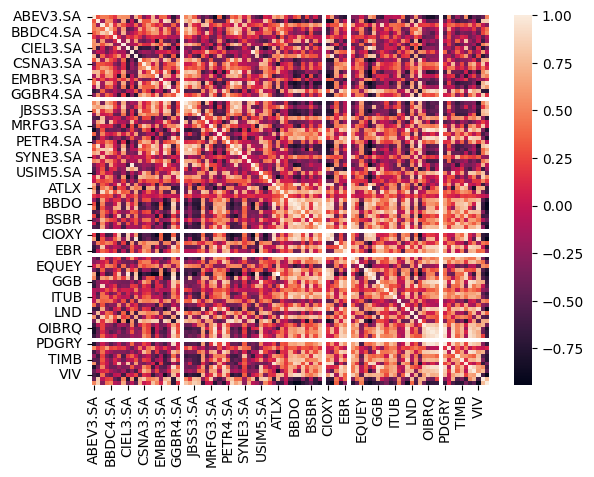

In [30]:
sns.heatmap(retornos)

In [42]:
plt.figure(figsize = (20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Axes: >

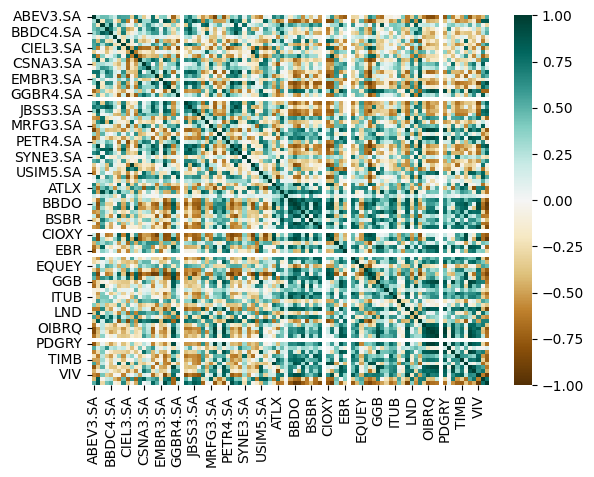

In [43]:
sns.heatmap(retornos, vmin = -1, vmax = 1, cmap = 'BrBG')